# Rebecca Hinrichs
## DATA 3401 -- Lab 5
### 22 Feb 2022

In [2]:
# Import pandas, seaborn and any modules/libraries you may need.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
# Read in the KNN Lab Data csv le from blackboard into a DataFrame and
# check the rst few rows of the DataFrame
data = pd.read_csv('KNN_Lab_Data.csv')
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


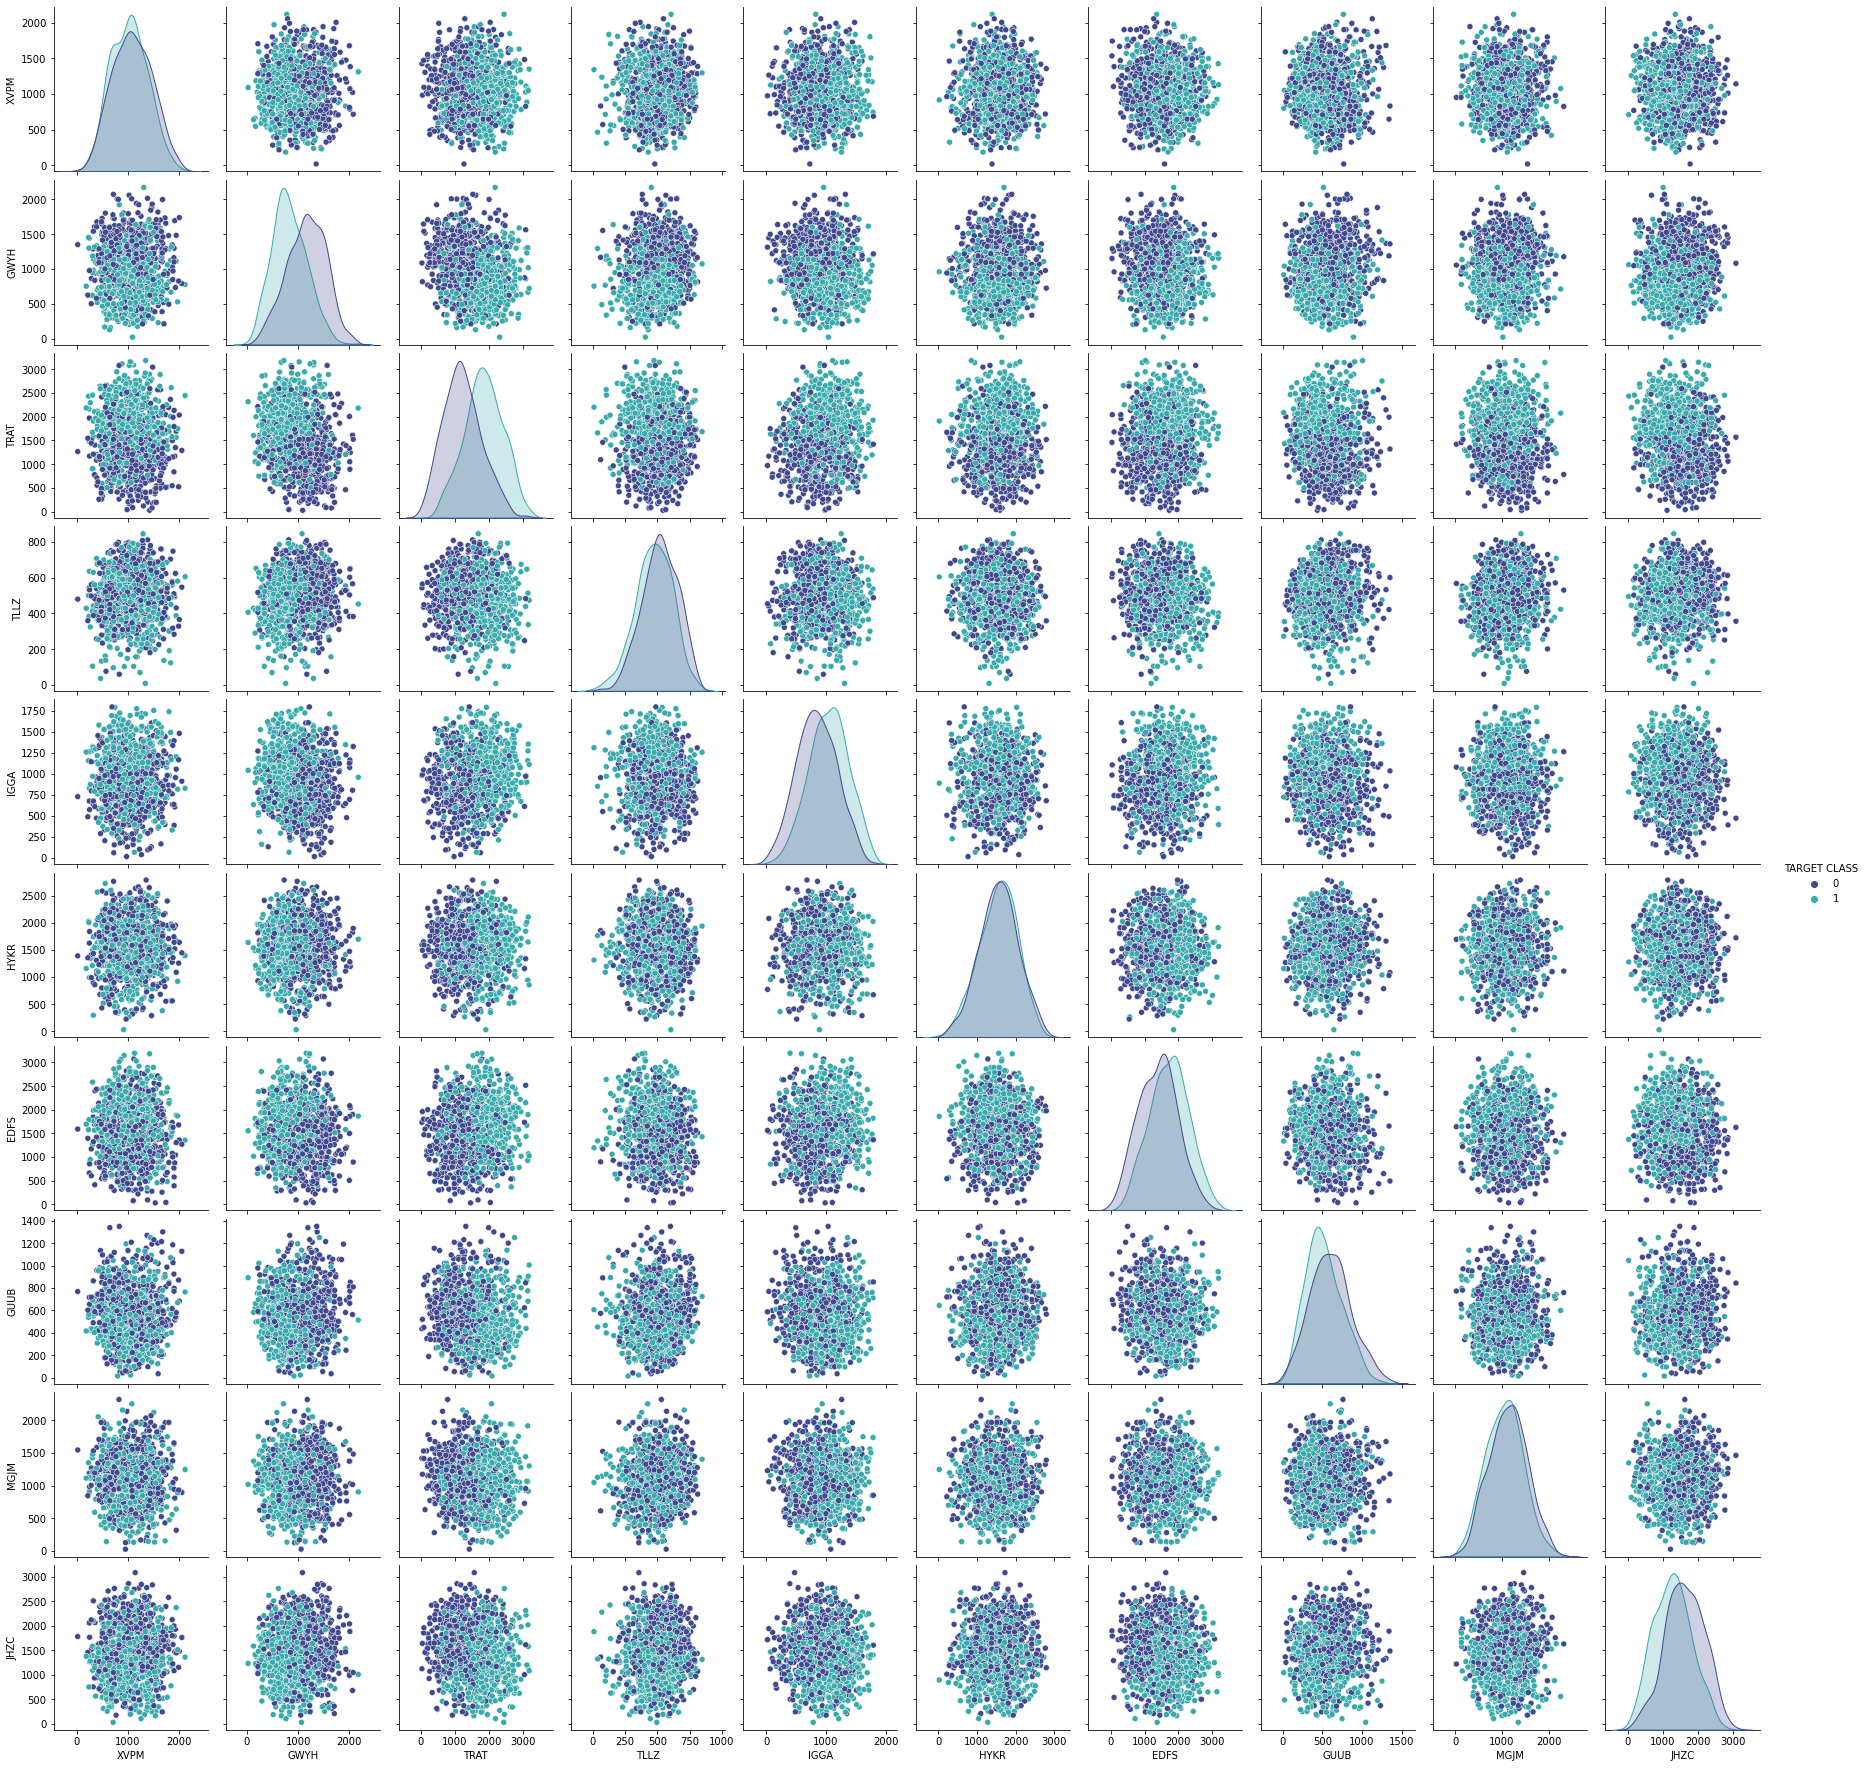

In [24]:
# Create a pairplot with the hue indicated by the `TARGETCLASS' column.
sns.pairplot(data, hue='TARGET CLASS', palette='mako')

In [25]:
# Import StandardScaler from Scikit learn, create a StandardScaler() object and
# t scaler to the features. Transform the features to a scaled version. Now
# convert the scaled features to a dataframe and check the head of this dataframe
# to make sure the scaling worked.
scaler = StandardScaler()
scaler.fit(data.drop('TARGET CLASS', axis=1))
scaled_feat = scaler.transform(data.drop('TARGET CLASS', axis=1))
data_feat = pd.DataFrame(scaled_feat, columns=data.columns[:-1])
data_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [26]:
# Split the data into a training and testing sets using a test size of 30% and create
# a KNN model instance with k = 1 and fit this KNN model to the training data
# with the manhattan distance. (Set random state = 101)
# training set
X_train, X_test, y_train, y_test = train_test_split(data_feat,
                                                   data['TARGET CLASS'],
                                                   test_size=0.30,  # test size of 30%
                                                   random_state = 101)  # random state = 101
# testing set (KNN model object)
knn = KNeighborsClassifier(n_neighbors=1, # this is k=1
                           metric='manhattan') # manhattan distance
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [27]:
# Predict values using your KNN model and X test.
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.72      0.73      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [28]:
# Create a confusion matrix and classication report and explain.
print(confusion_matrix(y_test,predictions))

[[109  43]
 [ 40 108]]


In [29]:
print('The upper lefthand and lower righthand corners represent confirmed accuracy of the test with the prediction values for k.\n\
The upper righthand and lower lefthand corners represent inaccuracy of the machine\'s predicted data with the outcome.')

The upper lefthand and lower righthand corners represent confirmed accuracy of the test with the prediction values for k.
The upper righthand and lower lefthand corners represent inaccuracy of the machine's predicted data with the outcome.


In [30]:
# Write a for loop that trains various KNN models with dierent k􀀀 values, then
# keep track of the error rate for each of these models. Refer to the lecture notes
# if you are confused.
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions_i = knn.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test))
error_rate

[0.28,
 0.29,
 0.21666666666666667,
 0.22,
 0.20666666666666667,
 0.21,
 0.18333333333333332,
 0.19,
 0.19,
 0.17666666666666667,
 0.18333333333333332,
 0.18333333333333332,
 0.18333333333333332,
 0.18,
 0.18,
 0.18,
 0.17,
 0.17333333333333334,
 0.17666666666666667,
 0.18333333333333332,
 0.17666666666666667,
 0.18333333333333332,
 0.16666666666666666,
 0.18,
 0.16666666666666666,
 0.17,
 0.16666666666666666,
 0.17333333333333334,
 0.16666666666666666,
 0.17333333333333334,
 0.16,
 0.16666666666666666,
 0.17333333333333334,
 0.17333333333333334,
 0.17,
 0.16666666666666666,
 0.16,
 0.16333333333333333,
 0.16]

In [31]:
# Retrain your model with the best k􀀀 value (up to you to decide the `best")
# and re-do the classication report and the confusion matrix. 

Text(0, 0.5, 'Error Rate')

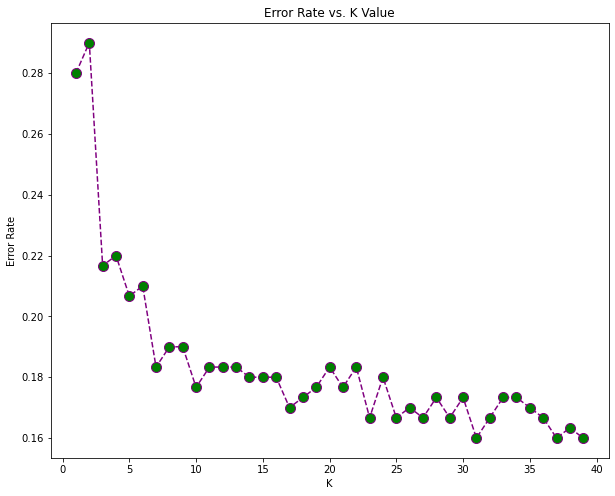

In [32]:
# determine best k-value
plt.figure(figsize = (10,8))
plt.plot(range(1,40), error_rate, color='purple', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
# these are the k-values where the minimum error rate occurs
find_min = pd.DataFrame(X_test, error_rate)
mins = np.where(error_rate == min(error_rate))
mins

(array([30, 36, 38], dtype=int64),)

In [34]:
# make list of values for iteration to compare outputs
poss_k = list(mins[0])
poss_k

[30, 36, 38]

In [35]:
for i in poss_k:
    # determine best k-value
    knn = KNeighborsClassifier(n_neighbors=i) # this makes k=each value in poss_k
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    # classification report
    print(classification_report(y_test,predictions))
    # confusion matrix
    print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

[[124  28]
 [ 24 124]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

[[125  27]
 [ 23 125]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       152
           1       0.83      0.84      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84     

In [38]:
# We see that the third reading from our trials produces the least False Positives and False Negatives
print(f'The best possible value for k within our range is ', poss_k[2], '.', sep='')
print('We could possibly determine better values by increasing our sample size, or our range for k.')

The best possible value for k within our range is 38.
We could possibly determine better values by increasing our sample size, or our range for k.


In [37]:
# How do the two scores compare?
print('The larger k value has a higher probability of certainty.')

The larger k value has a higher probability of certainty.
